# Settings

In [2]:
import numpy as np
from scipy import stats
from scipy import optimize
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import os
cwd = os.getcwd(); print("Working dir: " + cwd)

Working dir: /Users/yitengdang/Documents/Projects/Tabler_skull/Scripts/Scripts_image_analysis


In [3]:
# set to default
#import matplotlib as mpl
#mpl.rcParams.update(mpl.rcParamsDefault)

In [4]:
# Save folder
#save_folder = '/Users/dang/Documents/Projects/Tabler_skull/Figures/Live_imaging_intensity_profiles/'
#save_folder = os.path.split(cwd)[0] + "/Figures/"; 
save_folder = '/Users/yitengdang/Documents/Projects/Tabler_skull/_new_results'
print("Save plots in: " + save_folder)

Save plots in: /Users/yitengdang/Documents/Projects/Tabler_skull/_new_results


# Load data

In [8]:
folder_img = "/Users/yitengdang/Documents/Projects/Tabler_skull/Data_Live_Imaging/240108_manual_interface_intensities/CTRL_Osx_E13.75_170902"

files = ["frame1_ROI1_measurements.csv",
         "frame1_ROI2_measurements.csv",
         "frame1_ROI3_measurements.csv",
         "frame37_ROI1_measurements.csv",
         "frame37_ROI2_measurements.csv",
         "frame37_ROI3_measurements.csv",
         "frame85_ROI1_measurements.csv",
         "frame85_ROI2_measurements.csv",
         "frame85_ROI3_measurements.csv"]
fileID = "CTRL_Osx_E13.75_170902"
ROI_ids = ['ROI1', 'ROI2', 'ROI3', 'ROI1', 'ROI2', 'ROI3', 'ROI1', 'ROI2', 'ROI3']
frames = [1, 1, 1, 37, 37, 37, 85, 85, 85]

datas = []
for i in range(len(files)):   
    data_tmp = pd.read_csv( os.path.join( folder_img, files[i] ) )
    data_tmp['frame'] = frames[i]
    data_tmp['ROI'] = ROI_ids[i]

    # Normalise by mean value per ROI
    data_tmp['Mean_normalised']=data_tmp['Mean']/data_tmp['Mean'].mean()
    data_tmp['Std_normalised']=data_tmp['Mean_normalised'].std()
    
    # Convert to 8-bit values
    data_tmp['Mean_8bit']=data_tmp['Mean']
    data_tmp['Min_8bit']=data_tmp['Min']
    data_tmp['Max_8bit']=data_tmp['Max']
    
    datas.append( data_tmp )

data_cells_ctrl = pd.concat(datas)
data_cells_ctrl['Condition']='CTRL'
data_cells_ctrl['fileID']=fileID
data_cells_ctrl

,,Area,Mean,Min,Max,frame,ROI,Mean_normalised,Std_normalised,Mean_8bit,Min_8bit,Max_8bit,Condition,fileID
0,1,110.332,111.603,68,163,1,ROI1,1.065432,0.114000,111.603,68,163,CTRL,CTRL_Osx_E13.75_170902
1,2,143.344,111.134,72,164,1,ROI1,1.060954,0.114000,111.134,72,164,CTRL,CTRL_Osx_E13.75_170902
2,3,91.144,102.405,60,145,1,ROI1,0.977622,0.114000,102.405,60,145,CTRL,CTRL_Osx_E13.75_170902
3,4,127.560,119.719,57,174,1,ROI1,1.142912,0.114000,119.719,57,174,CTRL,CTRL_Osx_E13.75_170902
4,5,182.649,114.378,64,167,1,ROI1,1.091924,0.114000,114.378,64,167,CTRL,CTRL_Osx_E13.75_170902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,31,77.217,123.654,66,176,85,ROI3,0.855048,0.147797,123.654,66,176,CTRL,CTRL_Osx_E13.75_170902
31,32,87.120,125.870,61,187,85,ROI3,0.870371,0.147797,125.870,61,187,CTRL,CTRL_Osx_E13.75_170902
32,33,71.337,133.478,64,200,85,ROI3,0.922979,0.147797,133.478,64,200,CTRL,CTRL_Osx_E13.75_170902
33,34,96.457,126.509,67,178,85,ROI3,0.874790,0.147797,126.509,67,178,CTRL,CTRL_Osx_E13.75_170902


In [9]:
folder_img = "/Users/yitengdang/Documents/Projects/Tabler_skull/Data_Live_Imaging/240108_manual_interface_intensities/BAPN_Osx_E13.75_230412/"

files = ["MAX_E1375_BAPN_osx_tempfix_12042023-stitched.ome.tiff_frame1_ROI1_measurements.csv",
         "MAX_E1375_BAPN_osx_tempfix_12042023-stitched.ome.tiff_frame1_ROI2_measurements.csv",
         "MAX_E1375_BAPN_osx_tempfix_12042023-stitched.ome.tiff_frame1_ROI3_measurements.csv",
         "MAX_E1375_BAPN_osx_tempfix_12042023-stitched.ome.tiff_frame37_ROI1_measurements.csv",
         "MAX_E1375_BAPN_osx_tempfix_12042023-stitched.ome.tiff_frame37_ROI2_measurements.csv",
         "MAX_E1375_BAPN_osx_tempfix_12042023-stitched.ome.tiff_frame37_ROI3_measurements.csv",
         "MAX_E1375_BAPN_osx_tempfix_12042023-stitched.ome.tiff_frame85_ROI1_measurements.csv",
         "MAX_E1375_BAPN_osx_tempfix_12042023-stitched.ome.tiff_frame85_ROI2_measurements.csv",
         "MAX_E1375_BAPN_osx_tempfix_12042023-stitched.ome.tiff_frame85_ROI3_measurements.csv"]
fileID = "BAPN_Osx_E13.75_230412"
ROI_ids = ['ROI1', 'ROI2', 'ROI3', 'ROI1', 'ROI2', 'ROI3', 'ROI1', 'ROI2', 'ROI3']
frames = [1, 1, 1, 37, 37, 37, 85, 85, 85]

datas = []
for i in range(len(files)):   
    data_tmp = pd.read_csv( os.path.join( folder_img, files[i] ) )
    data_tmp['frame'] = frames[i]
    data_tmp['ROI'] = ROI_ids[i]

    # Normalise by mean value per ROI
    data_tmp['Mean_normalised']=data_tmp['Mean']/data_tmp['Mean'].mean()
    data_tmp['Std_normalised']=data_tmp['Mean_normalised'].std()
    
    # Convert to 8-bit values
    data_tmp['Mean_8bit']=data_tmp['Mean']/(2**8)
    data_tmp['Min_8bit']=data_tmp['Min']/(2**8)
    data_tmp['Max_8bit']=data_tmp['Max']/(2**8)
    
    datas.append( data_tmp )

data_cells_bapn = pd.concat(datas)
data_cells_bapn['Condition']='BAPN'
data_cells_bapn['fileID']=fileID
data_cells_bapn

,,Area,Mean,Min,Max,frame,ROI,Mean_normalised,Std_normalised,Mean_8bit,Min_8bit,Max_8bit,Condition,fileID
0,1,3216.440,1465.981,819,2646,1,ROI1,1.406423,0.156348,5.726488,3.199219,10.335938,BAPN,BAPN_Osx_E13.75_230412
1,2,1993.856,1139.228,704,2002,1,ROI1,1.092945,0.156348,4.450109,2.750000,7.820312,BAPN,BAPN_Osx_E13.75_230412
2,3,2845.960,1325.734,829,2243,1,ROI1,1.271873,0.156348,5.178648,3.238281,8.761719,BAPN,BAPN_Osx_E13.75_230412
3,4,3863.096,1267.897,833,2187,1,ROI1,1.216386,0.156348,4.952723,3.253906,8.542969,BAPN,BAPN_Osx_E13.75_230412
4,5,4849.920,1171.862,740,1863,1,ROI1,1.124253,0.156348,4.577586,2.890625,7.277344,BAPN,BAPN_Osx_E13.75_230412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,17,4455.864,1035.556,728,1542,85,ROI3,0.845160,0.107892,4.045141,2.843750,6.023438,BAPN,BAPN_Osx_E13.75_230412
17,18,3913.616,1203.958,733,2074,85,ROI3,0.982600,0.107892,4.702961,2.863281,8.101562,BAPN,BAPN_Osx_E13.75_230412
18,19,2344.128,1207.593,807,1859,85,ROI3,0.985567,0.107892,4.717160,3.152344,7.261719,BAPN,BAPN_Osx_E13.75_230412
19,20,2707.872,1258.611,789,1972,85,ROI3,1.027205,0.107892,4.916449,3.082031,7.703125,BAPN,BAPN_Osx_E13.75_230412


In [16]:
folder_img = "/Users/yitengdang/Documents/Projects/Tabler_skull/Data_Live_Imaging/240108_manual_interface_intensities/"

files = [
    "211223 BAPN E14.0/T0_ROI1_measurements.csv",
    "211223 BAPN E14.0/T0_ROI2_measurements.csv",
    "211223 BAPN E14.0/T0_ROI3_measurements.csv",
    "221114 BAPN E14.0/T0_ROI1_measurements.csv",
    "221114 BAPN E14.0/T0_ROI2_measurements.csv",
    "221114 BAPN E14.0/T0_ROI3_measurements.csv",
    "230127 BAPN E15.0/T0_ROI1_measurements.csv",
    "230127 BAPN E15.0/T0_ROI2_measurements.csv",
    "230127 BAPN E15.0/T0_ROI3_measurements.csv"]

fileIDs=[["BAPN_Osx_E14.0_240108"]*3, ["BAPN_Osx_E14.0_221114"]*3, ["BAPN_Osx_E15.0_230127"]*3]
fileIDs=[fileID for l in fileIDs for fileID in l] # flatten list
ROI_ids = ['ROI1', 'ROI2', 'ROI3']*3
frames = [1, 1, 1]*3

datas = []
for i in range(len(files)):   
    data_tmp = pd.read_csv( os.path.join( folder_img, files[i] ) )
    data_tmp['frame'] = frames[i]
    data_tmp['ROI'] = ROI_ids[i]
    data_tmp['fileID'] = fileIDs[i]
    
    # Normalise by mean value per ROI
    data_tmp['Mean_normalised']=data_tmp['Mean']/data_tmp['Mean'].mean()
    data_tmp['Std_normalised']=data_tmp['Mean_normalised'].std()
    
    # Convert to 8-bit values
    data_tmp['Mean_8bit']=data_tmp['Mean']/(2**8)
    data_tmp['Min_8bit']=data_tmp['Min']/(2**8)
    data_tmp['Max_8bit']=data_tmp['Max']/(2**8)
    
    datas.append( data_tmp )

data_cells_bapn_2 = pd.concat(datas)
data_cells_bapn_2['Condition']='BAPN'
data_cells_bapn_2

,,Area,Mean,Min,Max,frame,ROI,fileID,Mean_normalised,Std_normalised,Mean_8bit,Min_8bit,Max_8bit,Condition
0,1,138.494,893.074,631,1318,1,ROI1,BAPN_Osx_E14.0_240108,0.967312,0.069304,3.488570,2.464844,5.148438,BAPN
1,2,147.134,889.461,620,1505,1,ROI1,BAPN_Osx_E14.0_240108,0.963398,0.069304,3.474457,2.421875,5.878906,BAPN
2,3,124.654,1027.612,663,1583,1,ROI1,BAPN_Osx_E14.0_240108,1.113033,0.069304,4.014109,2.589844,6.183594,BAPN
3,4,77.931,922.719,613,1448,1,ROI1,BAPN_Osx_E14.0_240108,0.999421,0.069304,3.604371,2.394531,5.656250,BAPN
4,5,153.657,935.631,625,1601,1,ROI1,BAPN_Osx_E14.0_240108,1.013406,0.069304,3.654809,2.441406,6.253906,BAPN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,22,67.998,1452.316,931,1887,1,ROI3,BAPN_Osx_E15.0_230127,0.899208,0.153308,5.673109,3.636719,7.371094,BAPN
22,23,82.651,1431.959,952,1743,1,ROI3,BAPN_Osx_E15.0_230127,0.886604,0.153308,5.593590,3.718750,6.808594,BAPN
23,24,86.687,1545.275,1140,2040,1,ROI3,BAPN_Osx_E15.0_230127,0.956764,0.153308,6.036230,4.453125,7.968750,BAPN
24,25,98.795,1349.656,940,1674,1,ROI3,BAPN_Osx_E15.0_230127,0.835646,0.153308,5.272094,3.671875,6.539062,BAPN


## All results

In [18]:
data_cells = pd.concat([data_cells_ctrl, data_cells_bapn, data_cells_bapn_2])
data_cells

,,Area,Mean,Min,Max,frame,ROI,Mean_normalised,Std_normalised,Mean_8bit,Min_8bit,Max_8bit,Condition,fileID
0,1,110.332,111.603,68,163,1,ROI1,1.065432,0.114000,111.603000,68.000000,163.000000,CTRL,CTRL_Osx_E13.75_170902
1,2,143.344,111.134,72,164,1,ROI1,1.060954,0.114000,111.134000,72.000000,164.000000,CTRL,CTRL_Osx_E13.75_170902
2,3,91.144,102.405,60,145,1,ROI1,0.977622,0.114000,102.405000,60.000000,145.000000,CTRL,CTRL_Osx_E13.75_170902
3,4,127.560,119.719,57,174,1,ROI1,1.142912,0.114000,119.719000,57.000000,174.000000,CTRL,CTRL_Osx_E13.75_170902
4,5,182.649,114.378,64,167,1,ROI1,1.091924,0.114000,114.378000,64.000000,167.000000,CTRL,CTRL_Osx_E13.75_170902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,22,67.998,1452.316,931,1887,1,ROI3,0.899208,0.153308,5.673109,3.636719,7.371094,BAPN,BAPN_Osx_E15.0_230127
22,23,82.651,1431.959,952,1743,1,ROI3,0.886604,0.153308,5.593590,3.718750,6.808594,BAPN,BAPN_Osx_E15.0_230127
23,24,86.687,1545.275,1140,2040,1,ROI3,0.956764,0.153308,6.036230,4.453125,7.968750,BAPN,BAPN_Osx_E15.0_230127
24,25,98.795,1349.656,940,1674,1,ROI3,0.835646,0.153308,5.272094,3.671875,6.539062,BAPN,BAPN_Osx_E15.0_230127


In [19]:
data_cells['fileID'].value_counts()

fileID
CTRL_Osx_E13.75_170902    365
BAPN_Osx_E13.75_230412    194
BAPN_Osx_E14.0_221114     106
BAPN_Osx_E14.0_240108      94
BAPN_Osx_E15.0_230127      81
Name: count, dtype: int64

In [22]:
## Filter for t=0 cells (temporary)
data_cells=data_cells.loc[data_cells['frame']==1, :]
data_cells

,,Area,Mean,Min,Max,frame,ROI,Mean_normalised,Std_normalised,Mean_8bit,Min_8bit,Max_8bit,Condition,fileID
0,1,110.332,111.603,68,163,1,ROI1,1.065432,0.114000,111.603000,68.000000,163.000000,CTRL,CTRL_Osx_E13.75_170902
1,2,143.344,111.134,72,164,1,ROI1,1.060954,0.114000,111.134000,72.000000,164.000000,CTRL,CTRL_Osx_E13.75_170902
2,3,91.144,102.405,60,145,1,ROI1,0.977622,0.114000,102.405000,60.000000,145.000000,CTRL,CTRL_Osx_E13.75_170902
3,4,127.560,119.719,57,174,1,ROI1,1.142912,0.114000,119.719000,57.000000,174.000000,CTRL,CTRL_Osx_E13.75_170902
4,5,182.649,114.378,64,167,1,ROI1,1.091924,0.114000,114.378000,64.000000,167.000000,CTRL,CTRL_Osx_E13.75_170902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,22,67.998,1452.316,931,1887,1,ROI3,0.899208,0.153308,5.673109,3.636719,7.371094,BAPN,BAPN_Osx_E15.0_230127
22,23,82.651,1431.959,952,1743,1,ROI3,0.886604,0.153308,5.593590,3.718750,6.808594,BAPN,BAPN_Osx_E15.0_230127
23,24,86.687,1545.275,1140,2040,1,ROI3,0.956764,0.153308,6.036230,4.453125,7.968750,BAPN,BAPN_Osx_E15.0_230127
24,25,98.795,1349.656,940,1674,1,ROI3,0.835646,0.153308,5.272094,3.671875,6.539062,BAPN,BAPN_Osx_E15.0_230127


In [24]:
data_cells['ID_frame']= data_cells['Condition']+'_frame'+data_cells['frame'].astype(str)
#data_cells['ID']= data_cells['Condition']+'_frame'+data_cells['frame'].astype(str)+'_'+data_cells['ROI']
data_cells['ID']= data_cells['fileID']+'_'+data_cells['ROI']
data_cells['ID'].value_counts(sort=False)

/var/folders/t4/_pkr1km53qxc6hjp_s8_p7q40000gp/T/ipykernel_20077/2880485165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cells['ID_frame']= data_cells['Condition']+'_frame'+data_cells['frame'].astype(str)
/var/folders/t4/_pkr1km53qxc6hjp_s8_p7q40000gp/T/ipykernel_20077/2880485165.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cells['ID']= data_cells['fileID']+'_'+data_cells['ROI']


ID
CTRL_Osx_E13.75_170902_ROI1    43
CTRL_Osx_E13.75_170902_ROI2    27
CTRL_Osx_E13.75_170902_ROI3    33
BAPN_Osx_E13.75_230412_ROI1    19
BAPN_Osx_E13.75_230412_ROI2    23
BAPN_Osx_E13.75_230412_ROI3    20
BAPN_Osx_E14.0_240108_ROI1     32
BAPN_Osx_E14.0_240108_ROI2     29
BAPN_Osx_E14.0_240108_ROI3     33
BAPN_Osx_E14.0_221114_ROI1     41
BAPN_Osx_E14.0_221114_ROI2     34
BAPN_Osx_E14.0_221114_ROI3     31
BAPN_Osx_E15.0_230127_ROI1     30
BAPN_Osx_E15.0_230127_ROI2     25
BAPN_Osx_E15.0_230127_ROI3     26
Name: count, dtype: int64

<Axes: xlabel='Mean', ylabel='ID'>

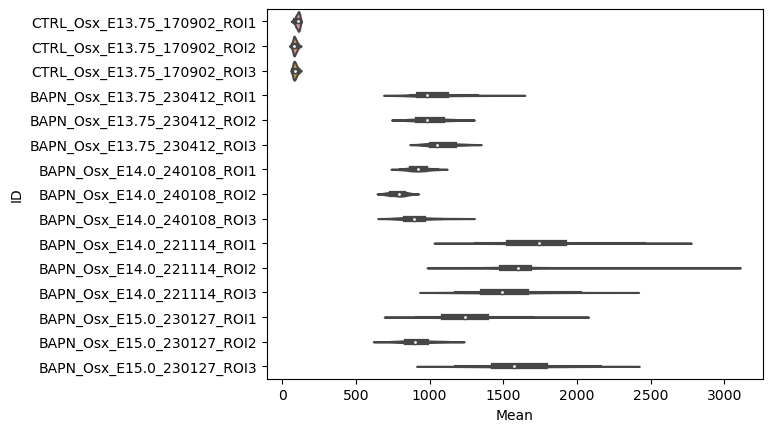

In [25]:
sns.violinplot( data=data_cells, x='Mean', y='ID') #, hue='ID', x='frame' )

<Axes: xlabel='Mean', ylabel='ID'>

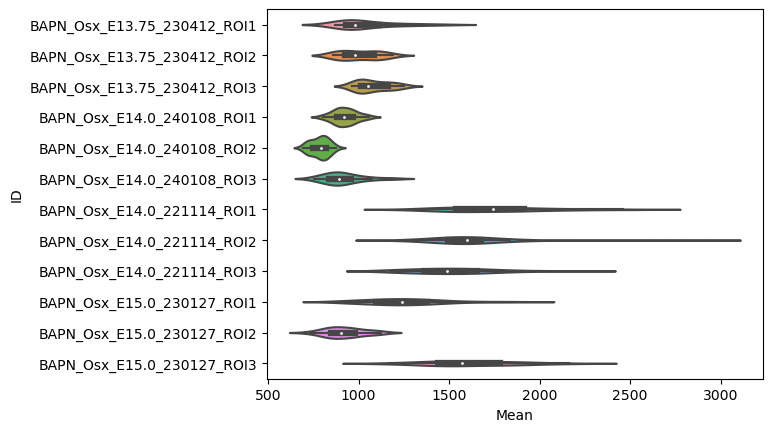

In [26]:
sns.violinplot( data=data_cells.loc[data_cells['Condition']=='BAPN', :], x='Mean', y='ID') #, hue='ID', x='frame' )

<Axes: xlabel='Mean_normalised', ylabel='ID'>

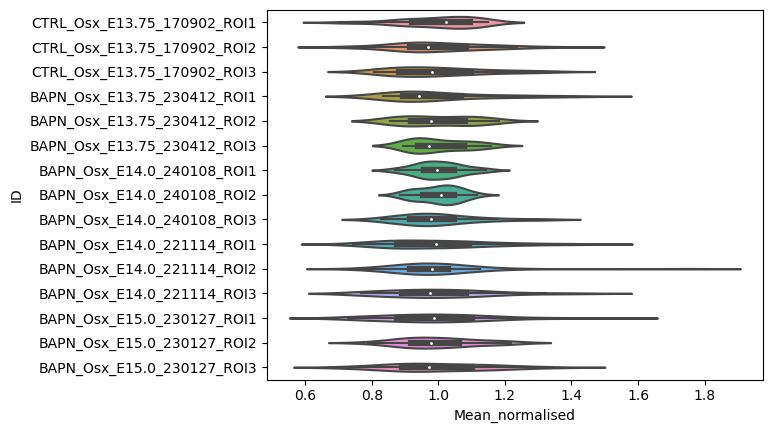

In [27]:
sns.violinplot( data=data_cells, x='Mean_normalised', y='ID') #, hue='ID', x='frame' )

## Dispersion

In [29]:
data_cells

,,Area,Mean,Min,Max,frame,ROI,Mean_normalised,Std_normalised,Mean_8bit,Min_8bit,Max_8bit,Condition,fileID,ID_frame,ID
0,1,110.332,111.603,68,163,1,ROI1,1.065432,0.114000,111.603000,68.000000,163.000000,CTRL,CTRL_Osx_E13.75_170902,CTRL_frame1,CTRL_Osx_E13.75_170902_ROI1
1,2,143.344,111.134,72,164,1,ROI1,1.060954,0.114000,111.134000,72.000000,164.000000,CTRL,CTRL_Osx_E13.75_170902,CTRL_frame1,CTRL_Osx_E13.75_170902_ROI1
2,3,91.144,102.405,60,145,1,ROI1,0.977622,0.114000,102.405000,60.000000,145.000000,CTRL,CTRL_Osx_E13.75_170902,CTRL_frame1,CTRL_Osx_E13.75_170902_ROI1
3,4,127.560,119.719,57,174,1,ROI1,1.142912,0.114000,119.719000,57.000000,174.000000,CTRL,CTRL_Osx_E13.75_170902,CTRL_frame1,CTRL_Osx_E13.75_170902_ROI1
4,5,182.649,114.378,64,167,1,ROI1,1.091924,0.114000,114.378000,64.000000,167.000000,CTRL,CTRL_Osx_E13.75_170902,CTRL_frame1,CTRL_Osx_E13.75_170902_ROI1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,22,67.998,1452.316,931,1887,1,ROI3,0.899208,0.153308,5.673109,3.636719,7.371094,BAPN,BAPN_Osx_E15.0_230127,BAPN_frame1,BAPN_Osx_E15.0_230127_ROI3
22,23,82.651,1431.959,952,1743,1,ROI3,0.886604,0.153308,5.593590,3.718750,6.808594,BAPN,BAPN_Osx_E15.0_230127,BAPN_frame1,BAPN_Osx_E15.0_230127_ROI3
23,24,86.687,1545.275,1140,2040,1,ROI3,0.956764,0.153308,6.036230,4.453125,7.968750,BAPN,BAPN_Osx_E15.0_230127,BAPN_frame1,BAPN_Osx_E15.0_230127_ROI3
24,25,98.795,1349.656,940,1674,1,ROI3,0.835646,0.153308,5.272094,3.671875,6.539062,BAPN,BAPN_Osx_E15.0_230127,BAPN_frame1,BAPN_Osx_E15.0_230127_ROI3


### Combine ROIs and compare experiments

In [30]:
data_cells_grouped_by_ID_frame = data_cells.groupby('fileID').agg(
    std_of_cell_mean_norm = ("Mean_normalised", "std"),
    Condition = ("Condition", "first"),
    ID_frame = ("ID_frame", "first")
)
data_cells_grouped_by_ID_frame

,std_of_cell_mean_norm,Condition,ID_frame
fileID,,,
BAPN_Osx_E13.75_230412,0.116602,BAPN,BAPN_frame1
BAPN_Osx_E14.0_221114,0.160544,BAPN,BAPN_frame1
BAPN_Osx_E14.0_240108,0.086910,BAPN,BAPN_frame1
BAPN_Osx_E15.0_230127,0.148422,BAPN,BAPN_frame1
CTRL_Osx_E13.75_170902,0.129526,CTRL,CTRL_frame1


<Axes: xlabel='std_of_cell_mean_norm', ylabel='Condition'>

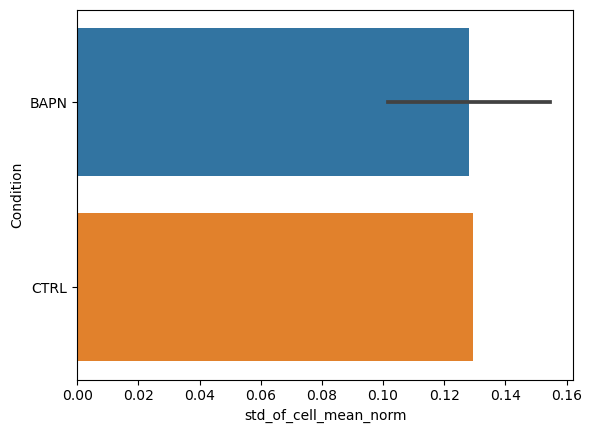

In [31]:
sns.barplot( data=data_cells_grouped_by_ID_frame, y='Condition', x='std_of_cell_mean_norm')

<Axes: xlabel='std_of_cell_mean_norm', ylabel='ID_frame'>

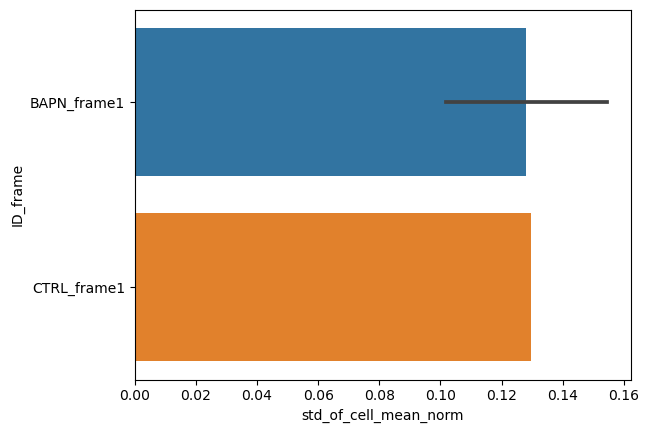

In [32]:
sns.barplot( data=data_cells_grouped_by_ID_frame, y='ID_frame', x='std_of_cell_mean_norm')

### Separate ROIs

In [35]:
data_cells_grouped=data_cells.groupby('ID').first()
data_cells_grouped['ID']=data_cells_grouped.index.values
data_cells_grouped

,,Area,Mean,Min,Max,frame,ROI,Mean_normalised,Std_normalised,Mean_8bit,Min_8bit,Max_8bit,Condition,fileID,ID_frame,ID
ID,,,,,,,,,,,,,,,,
BAPN_Osx_E13.75_230412_ROI1,1,3216.440,1465.981,819,2646,1,ROI1,1.406423,0.156348,5.726488,3.199219,10.335938,BAPN,BAPN_Osx_E13.75_230412,BAPN_frame1,BAPN_Osx_E13.75_230412_ROI1
BAPN_Osx_E13.75_230412_ROI2,1,3964.136,1188.512,743,1877,1,ROI2,1.182329,0.107833,4.642625,2.902344,7.332031,BAPN,BAPN_Osx_E13.75_230412,BAPN_frame1,BAPN_Osx_E13.75_230412_ROI2
BAPN_Osx_E13.75_230412_ROI3,1,2320.552,1018.340,713,1540,1,ROI3,0.942785,0.083837,3.977891,2.785156,6.015625,BAPN,BAPN_Osx_E13.75_230412,BAPN_frame1,BAPN_Osx_E13.75_230412_ROI3
BAPN_Osx_E14.0_221114_ROI1,1,59.224,2500.641,1325,3256,1,ROI1,1.425621,0.165269,9.768129,5.175781,12.718750,BAPN,BAPN_Osx_E14.0_221114,BAPN_frame1,BAPN_Osx_E14.0_221114_ROI1
BAPN_Osx_E14.0_221114_ROI2,1,85.458,1603.297,1038,2057,1,ROI2,0.983648,0.162229,6.262879,4.054688,8.035156,BAPN,BAPN_Osx_E14.0_221114,BAPN_frame1,BAPN_Osx_E14.0_221114_ROI2
BAPN_Osx_E14.0_221114_ROI3,1,94.145,1611.479,1058,2096,1,ROI3,1.052875,0.157613,6.294840,4.132812,8.187500,BAPN,BAPN_Osx_E14.0_221114,BAPN_frame1,BAPN_Osx_E14.0_221114_ROI3
BAPN_Osx_E14.0_240108_ROI1,1,138.494,893.074,631,1318,1,ROI1,0.967312,0.069304,3.488570,2.464844,5.148438,BAPN,BAPN_Osx_E14.0_240108,BAPN_frame1,BAPN_Osx_E14.0_240108_ROI1
BAPN_Osx_E14.0_240108_ROI2,1,220.392,747.640,576,1111,1,ROI2,0.952299,0.062470,2.920469,2.250000,4.339844,BAPN,BAPN_Osx_E14.0_240108,BAPN_frame1,BAPN_Osx_E14.0_240108_ROI2
BAPN_Osx_E14.0_240108_ROI3,1,175.873,1076.606,697,1791,1,ROI3,1.177183,0.117831,4.205492,2.722656,6.996094,BAPN,BAPN_Osx_E14.0_240108,BAPN_frame1,BAPN_Osx_E14.0_240108_ROI3


<Axes: xlabel='Std_normalised', ylabel='Condition'>

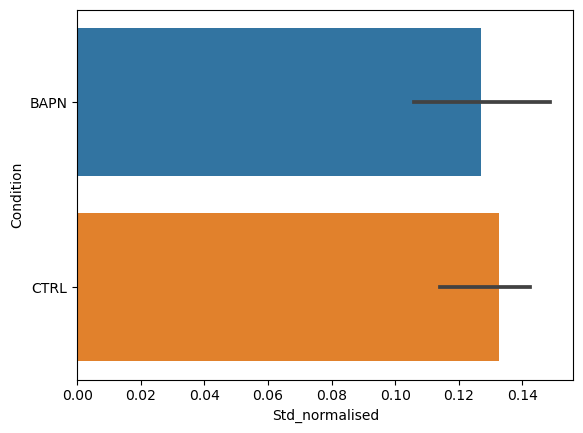

In [37]:
sns.barplot( data=data_cells_grouped, y='Condition', x='Std_normalised')

<Axes: xlabel='Std_normalised', ylabel='Condition'>

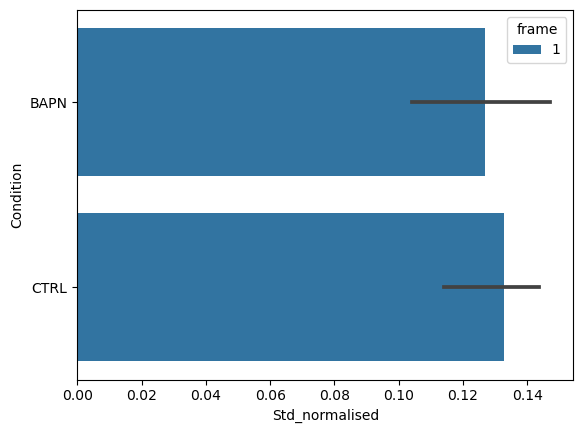

In [38]:
sns.barplot( data=data_cells_grouped, y='Condition', x='Std_normalised', hue='frame')

<Axes: xlabel='Std_normalised', ylabel='ID'>

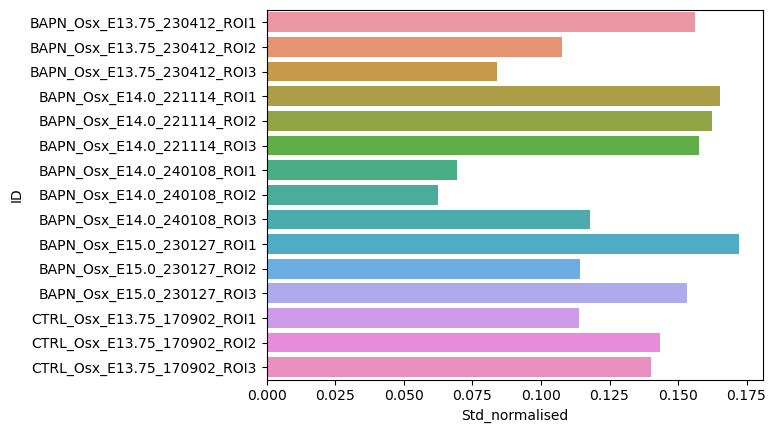

In [39]:
sns.barplot( data=data_cells_grouped, y='ID', x='Std_normalised')

# Previous results for t=0, 37 and 85

In [75]:
data_cells = pd.concat([data_cells_ctrl, data_cells_bapn])
data_cells['ID_frame']= data_cells['Condition']+'_frame'+data_cells['frame'].astype(str)
data_cells['ID']= data_cells['Condition']+'_frame'+data_cells['frame'].astype(str)+'_'+data_cells['ROI']
data_cells['ID'].value_counts(sort=False)

ID
CTRL_frame1_ROI1     43
CTRL_frame1_ROI2     27
CTRL_frame1_ROI3     33
CTRL_frame37_ROI1    46
CTRL_frame37_ROI2    38
CTRL_frame37_ROI3    47
CTRL_frame85_ROI1    50
CTRL_frame85_ROI2    46
CTRL_frame85_ROI3    35
BAPN_frame1_ROI1     19
BAPN_frame1_ROI2     23
BAPN_frame1_ROI3     20
BAPN_frame37_ROI1    23
BAPN_frame37_ROI2    22
BAPN_frame37_ROI3    26
BAPN_frame85_ROI1    17
BAPN_frame85_ROI2    23
BAPN_frame85_ROI3    21
Name: count, dtype: int64

<Axes: xlabel='Mean', ylabel='ID'>

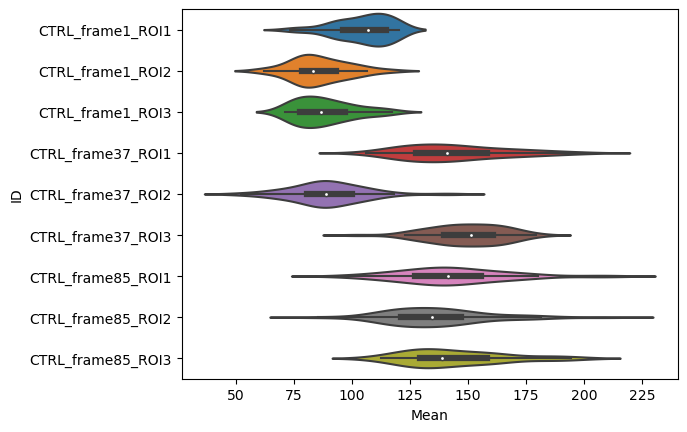

In [28]:
sns.violinplot( data=data_cells.loc[data_cells['Condition']=='CTRL', :], x='Mean', y='ID') #, hue='ID', x='frame' )

<Axes: xlabel='Mean', ylabel='ID'>

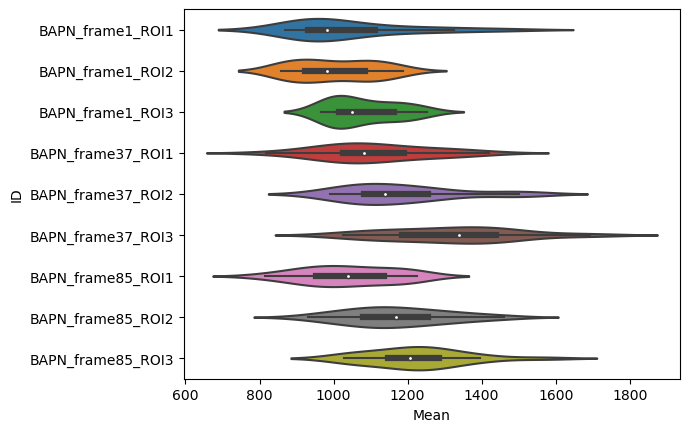

In [30]:
sns.violinplot( data=data_cells.loc[data_cells['Condition']=='BAPN', :], x='Mean', y='ID') #, hue='ID', x='frame' )

<Axes: xlabel='Mean_normalised', ylabel='ID'>

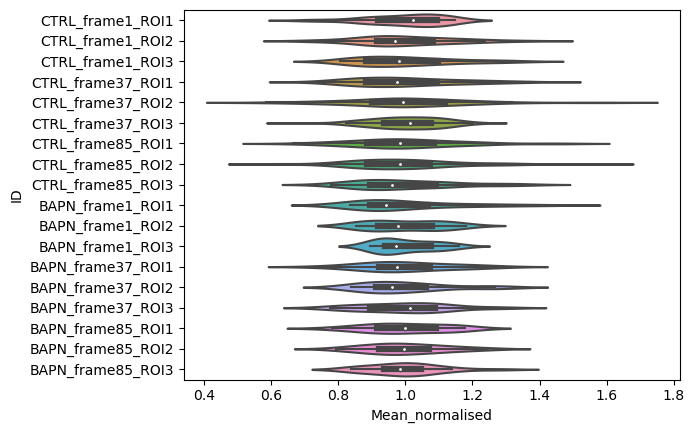

In [43]:
sns.violinplot( data=data_cells, x='Mean_normalised', y='ID') #, hue='ID', x='frame' )

## Dispersion

### Combine ROIs

In [88]:
data_cells_grouped_by_ID_frame = data_cells.groupby('ID_frame').agg(
    std_of_cell_mean_norm = ("Mean_normalised", "std"),
    Condition = ("Condition", "first"),
    ID_frame = ("ID_frame", "first")
)
data_cells_grouped_by_ID_frame

,std_of_cell_mean_norm,Condition,ID_frame
ID_frame,,,
BAPN_frame1,0.116602,BAPN,BAPN_frame1
BAPN_frame37,0.131138,BAPN,BAPN_frame37
BAPN_frame85,0.112536,BAPN,BAPN_frame85
CTRL_frame1,0.129526,CTRL,CTRL_frame1
CTRL_frame37,0.146362,CTRL,CTRL_frame37
CTRL_frame85,0.157753,CTRL,CTRL_frame85


<Axes: xlabel='std_of_cell_mean_norm', ylabel='Condition'>

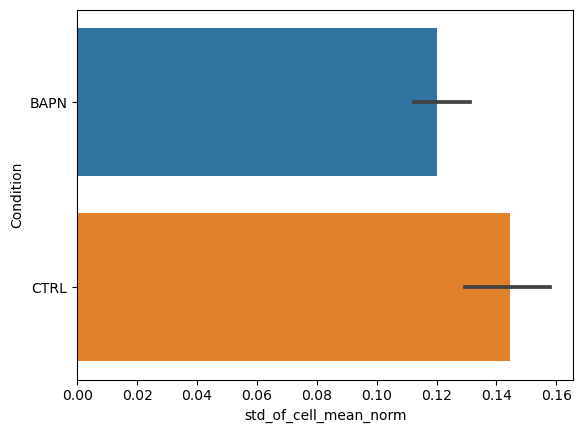

In [89]:
sns.barplot( data=data_cells_grouped_by_ID_frame, y='Condition', x='std_of_cell_mean_norm')

<Axes: xlabel='std_of_cell_mean_norm', ylabel='ID_frame'>

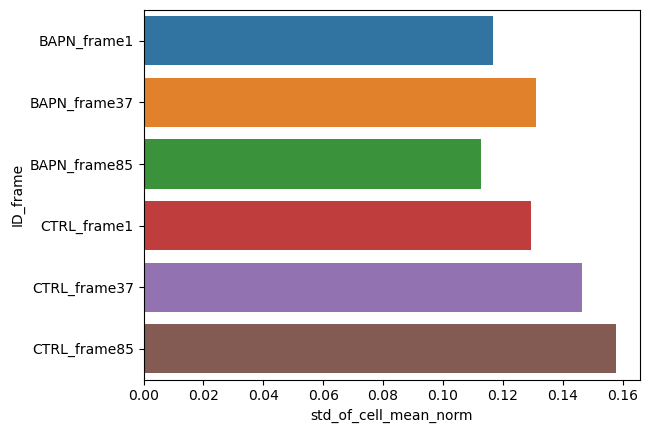

In [91]:
sns.barplot( data=data_cells_grouped_by_ID_frame, y='ID_frame', x='std_of_cell_mean_norm')

### Separate ROIs

In [74]:
data_cells_grouped=data_cells.groupby('ID').first()
data_cells_grouped['ID']=data_cells_grouped.index.values
data_cells_grouped

,,Area,Mean,Min,Max,frame,ROI,Mean_normalised,Std_normalised,Mean_8bit,Min_8bit,Max_8bit,Condition,ID
ID,,,,,,,,,,,,,,
BAPN_frame1_ROI1,1,3216.440,1465.981,819,2646,1,ROI1,1.406423,0.156348,5.726488,3.199219,10.335938,BAPN,BAPN_frame1_ROI1
BAPN_frame1_ROI2,1,3964.136,1188.512,743,1877,1,ROI2,1.182329,0.107833,4.642625,2.902344,7.332031,BAPN,BAPN_frame1_ROI2
BAPN_frame1_ROI3,1,2320.552,1018.340,713,1540,1,ROI3,0.942785,0.083837,3.977891,2.785156,6.015625,BAPN,BAPN_frame1_ROI3
BAPN_frame37_ROI1,1,3980.976,1204.280,758,1859,37,ROI1,1.084958,0.134701,4.704219,2.960938,7.261719,BAPN,BAPN_frame37_ROI1
BAPN_frame37_ROI2,1,2202.672,1500.310,1076,2324,37,ROI2,1.267621,0.131472,5.860586,4.203125,9.078125,BAPN,BAPN_frame37_ROI2
BAPN_frame37_ROI3,1,2266.664,1666.487,1007,3190,37,ROI3,1.261297,0.132914,6.509715,3.933594,12.460938,BAPN,BAPN_frame37_ROI3
BAPN_frame85_ROI1,1,5314.704,988.578,686,1617,85,ROI1,0.950827,0.118477,3.861633,2.679688,6.316406,BAPN,BAPN_frame85_ROI1
BAPN_frame85_ROI2,1,5301.232,1192.234,870,1919,85,ROI2,1.017581,0.117252,4.657164,3.398438,7.496094,BAPN,BAPN_frame85_ROI2
BAPN_frame85_ROI3,1,4604.056,1308.580,868,2155,85,ROI3,1.067987,0.107892,5.111641,3.390625,8.417969,BAPN,BAPN_frame85_ROI3


<Axes: xlabel='Std_normalised', ylabel='Condition'>

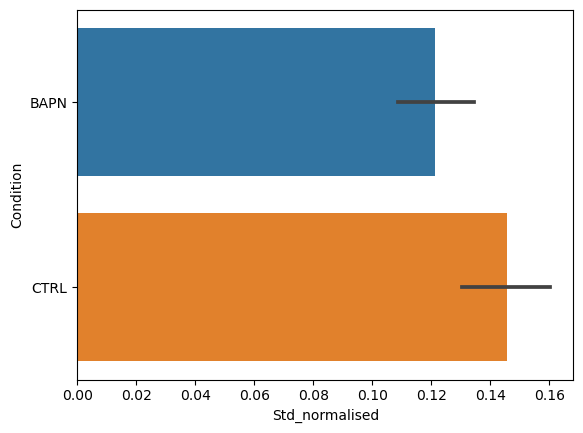

In [65]:
sns.barplot( data=data_cells_grouped, y='Condition', x='Std_normalised')

<Axes: xlabel='Std_normalised', ylabel='Condition'>

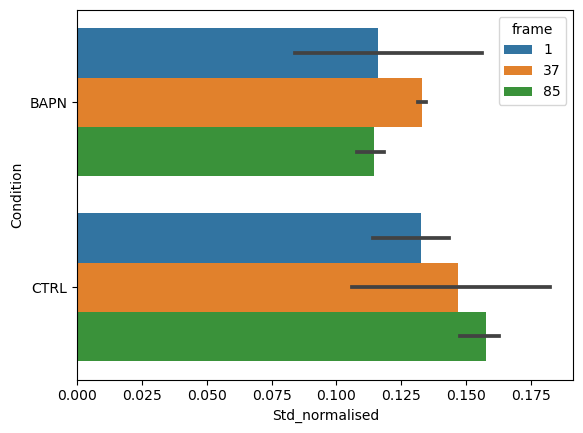

In [69]:
sns.barplot( data=data_cells_grouped, y='Condition', x='Std_normalised', hue='frame')

<Axes: xlabel='Std_normalised', ylabel='ID'>

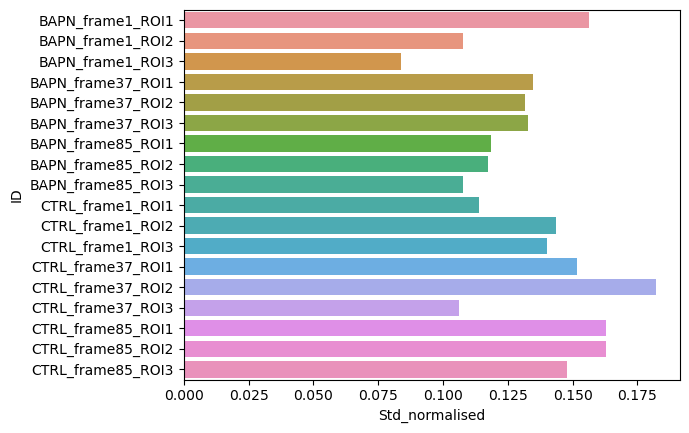

In [66]:
sns.barplot( data=data_cells_grouped, y='ID', x='Std_normalised')